In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from nltk.tokenize import TweetTokenizer

In [2]:
tweet_tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)

def tokenize(tweet):
    return tweet_tokenizer.tokenize(tweet)

In [3]:
train_path='SemEval2018-Task1-all-data/SemEval2018-Task1-all-data/English/E-c/2018-E-c-En-train.txt'
test_path='SemEval2018-Task1-all-data/SemEval2018-Task1-all-data/English/E-c/2018-E-c-En-dev.txt'

In [4]:
train = pd.read_csv(train_path, sep='\t')
test = pd.read_csv(test_path, sep='\t')

In [5]:
len(train)

6838

In [6]:
len(test)

886

In [7]:
train.columns

Index(['ID', 'Tweet', 'anger', 'anticipation', 'disgust', 'fear', 'joy',
       'love', 'optimism', 'pessimism', 'sadness', 'surprise', 'trust'],
      dtype='object')

In [8]:
test.columns

Index(['ID', 'Tweet', 'anger', 'anticipation', 'disgust', 'fear', 'joy',
       'love', 'optimism', 'pessimism', 'sadness', 'surprise', 'trust'],
      dtype='object')

In [9]:
train['tokens'] = train['Tweet'].map(lambda x: tokenize(x))

In [10]:
test['tokens'] = test['Tweet'].map(lambda x: tokenize(x))

In [11]:
train['lengths'] = train['tokens'].map(lambda x: len(x))
test['lengths'] = test['tokens'].map(lambda x: len(x))

In [12]:
train.describe()

,anger,anticipation,disgust,fear,joy,love,optimism,pessimism,sadness,surprise,trust,lengths
count,6838.000000,6838.000000,6838.000000,6838.000000,6838.000000,6838.000000,6838.000000,6838.000000,6838.000000,6838.000000,6838.000000,6838.000000
mean,0.372039,0.143024,0.380521,0.181632,0.362240,0.102369,0.290143,0.116262,0.293653,0.052793,0.052208,17.670371
std,0.483384,0.350123,0.485550,0.385569,0.480683,0.303155,0.453862,0.320562,0.455468,0.223637,0.222463,7.760106
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
75%,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,24.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,50.000000


# Correlation Among Emotions


In [13]:
train.corr()

,anger,anticipation,disgust,fear,joy,love,optimism,pessimism,sadness,surprise,trust,lengths
anger,1.000000,-0.170124,0.682969,-0.047142,-0.442866,-0.242966,-0.374092,-0.036596,0.078355,-0.055887,-0.150728,0.052817
anticipation,-0.170124,1.000000,-0.152412,-0.019108,0.081457,-0.037367,0.130001,-0.064773,-0.123996,0.118370,0.123825,0.019885
disgust,0.682969,-0.152412,1.000000,0.003432,-0.457816,-0.249769,-0.407485,0.035226,0.159333,-0.053027,-0.162280,0.046841
fear,-0.047142,-0.019108,0.003432,1.000000,-0.235887,-0.134069,-0.175820,0.104849,0.066865,-0.012839,-0.062824,-0.001643
joy,-0.442866,0.081457,-0.457816,-0.235887,1.000000,0.402923,0.520464,-0.220199,-0.330276,0.038412,0.163697,-0.006882
love,-0.242966,-0.037367,-0.249769,-0.134069,0.402923,1.000000,0.265651,-0.107437,-0.166897,-0.019320,0.098579,-0.009031
optimism,-0.374092,0.130001,-0.407485,-0.175820,0.520464,0.265651,1.000000,-0.172575,-0.281325,-0.016920,0.252666,0.050996
pessimism,-0.036596,-0.064773,0.035226,0.104849,-0.220199,-0.107437,-0.172575,1.000000,0.304080,-0.038704,-0.070771,0.005824
sadness,0.078355,-0.123996,0.159333,0.066865,-0.330276,-0.166897,-0.281325,0.304080,1.000000,-0.048834,-0.115241,0.008893
surprise,-0.055887,0.118370,-0.053027,-0.012839,0.038412,-0.019320,-0.016920,-0.038704,-0.048834,1.000000,0.006329,-0.021239


In [14]:
import seaborn as sns

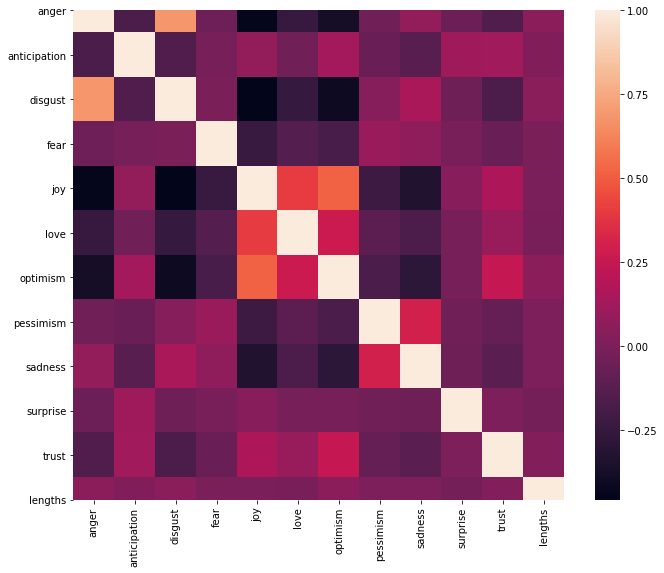

In [15]:
plt.subplots(figsize=(11,9))
sns.heatmap(train.corr())

# Class Balance for all Labels

In [16]:
g_anger = train.groupby("anger").size()
g_anger

anger
0    4294
1    2544
dtype: int64

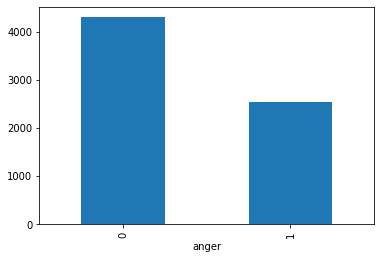

In [17]:
g_anger.plot.bar()

In [18]:
g_anticipation = train.groupby("anticipation").size()
g_anticipation

anticipation
0    5860
1     978
dtype: int64

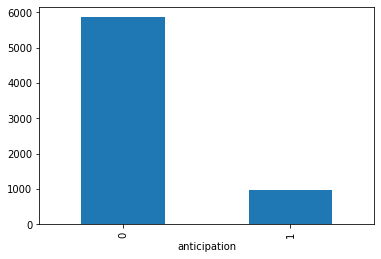

In [19]:
g_anticipation.plot.bar()

In [20]:
g_disgust = train.groupby("disgust").size()
g_disgust

disgust
0    4236
1    2602
dtype: int64

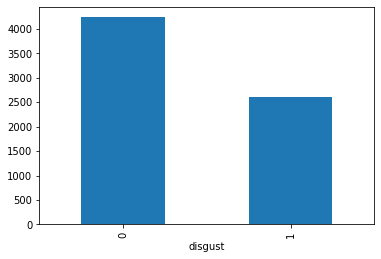

In [21]:
g_disgust.plot.bar()

In [22]:
g_fear = train.groupby("fear").size()
g_fear

fear
0    5596
1    1242
dtype: int64

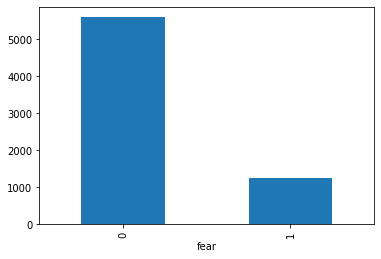

In [23]:
g_fear.plot.bar()

In [24]:
g_joy = train.groupby("joy").size()
g_joy

joy
0    4361
1    2477
dtype: int64

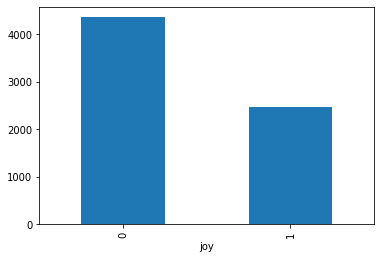

In [25]:
g_joy.plot.bar()

In [26]:
g_love = train.groupby("love").size()
g_love

love
0    6138
1     700
dtype: int64

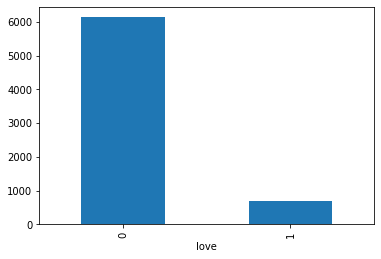

In [27]:
g_love.plot.bar()

In [28]:
g_optimism = train.groupby("optimism").size()
g_optimism

optimism
0    4854
1    1984
dtype: int64

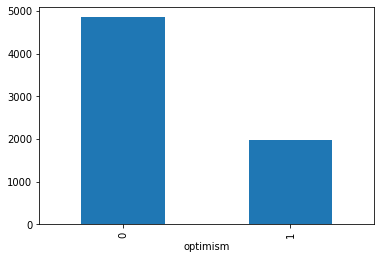

In [29]:
g_optimism.plot.bar()

In [30]:

g_pessimism = train.groupby("pessimism").size()
g_pessimism

pessimism
0    6043
1     795
dtype: int64

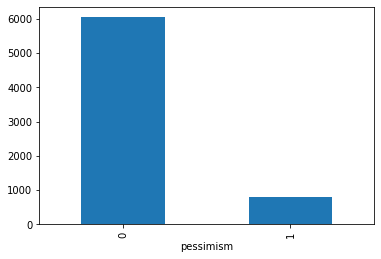

In [31]:
g_pessimism.plot.bar()

In [32]:
g_sadness = train.groupby("sadness").size()
g_sadness

sadness
0    4830
1    2008
dtype: int64

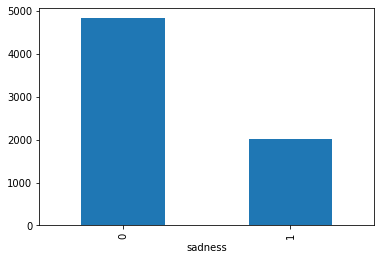

In [33]:
g_sadness.plot.bar()

In [34]:
surprise = train.groupby("surprise").size()
surprise

surprise
0    6477
1     361
dtype: int64

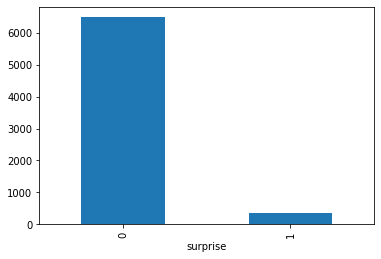

In [35]:
surprise.plot.bar()


In [36]:
trust = train.groupby("trust").size()
trust

trust
0    6481
1     357
dtype: int64

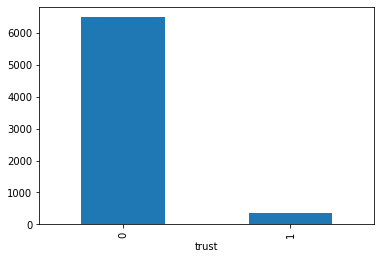

In [37]:
trust.plot.bar()


# Number of Emotions per Tweet

In [39]:
train['total_emotions'] = train.apply(lambda x: x['anger']+x['anticipation']+x['disgust']+x['fear']+x['joy']+x['love']+x['optimism']+x['pessimism']+x['sadness']+x['surprise']+x['trust'], axis=1)

In [40]:
train.groupby("total_emotions").size()

total_emotions
0     204
1     982
2    2773
3    2114
4     658
5      96
6      11
dtype: int64

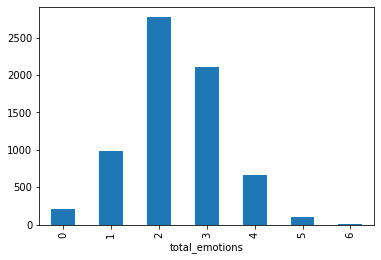

In [41]:
train.groupby("total_emotions").size().plot.bar()


# Number of Tokens Distribution

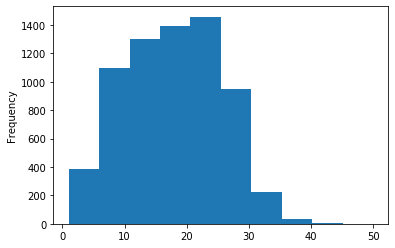

In [44]:
train.lengths.plot.hist()